# import packages, read original data and pick a subset of columns

In [1]:
# import base packages

import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
master_data = pd.read_csv('flights.csv', low_memory=False)

In [3]:
master_data.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [4]:
master_data.weather_delay.unique()

array([  nan,    0.,   25., ..., 1256., 1331., 1306.])

In [5]:
master_data.groupby('origin')['weather_delay'].mean().sort_values().tail()

origin
IMT    26.456853
DRT    28.705882
PIR    29.524752
EKO    29.698630
APN    39.904255
Name: weather_delay, dtype: float64

In [ ]:
master_data.groupby('origin')['carrier_delay'].mean().sort_values().tail()

origin
ATY    54.505495
CYS    54.690476
JMS    58.299363
SHD    64.247863
DVL    76.062500
Name: carrier_delay, dtype: float64

In [ ]:
master_data.groupby('origin')['security_delay'].mean().sort_values().tail()

origin
DLG     2.923077
OME     3.282258
BET     7.101382
AKN    19.166667
ADK    28.093750
Name: security_delay, dtype: float64

In [ ]:
master_data.groupby('origin')['nas_delay'].mean().sort_values().tail()

origin
ACY    37.753309
RDD    39.344765
HOB    41.676329
HYA    46.425532
PQI    59.389961
Name: nas_delay, dtype: float64

In [6]:
master_data.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [13]:
# read flights data (note that only columns in flights_test were picked)

data = pd.read_csv('flights.csv', usecols=['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier', 'op_unique_carrier', 'tail_num',
       'origin_airport_id', 'origin', 'dest', 'crs_dep_time', 'dep_delay',
       'crs_arr_time', 'crs_elapsed_time', 'distance', 'cancellation_code', 'air_time'], low_memory=False)

In [14]:
data.shape

(15927485, 16)

In [15]:
# create a dictionary to read unique counts in each column

{column: len(data[column].unique()) for column in data.columns}

{'fl_date': 730,
 'mkt_unique_carrier': 11,
 'branded_code_share': 16,
 'mkt_carrier': 11,
 'op_unique_carrier': 28,
 'tail_num': 6488,
 'origin_airport_id': 376,
 'origin': 376,
 'dest': 376,
 'crs_dep_time': 1412,
 'dep_delay': 1750,
 'crs_arr_time': 1437,
 'cancellation_code': 6,
 'crs_elapsed_time': 694,
 'air_time': 698,
 'distance': 1623}

In [16]:
planes = pd.read_csv('planes.csv')

In [17]:
planes = planes.rename(columns = {'tailnum':'tail_num'})

In [74]:
planes = planes[['tail_num', 'model']]

In [76]:
type(planes)

pandas.core.frame.DataFrame

# sampling flights data for testing only

In [90]:
flights_sample = data.sample(frac=0.30, random_state=143)

In [91]:
flights_sample = pd.merge(flights_sample, planes, on="tail_num", how='left')

In [92]:
flights_sample.shape

(4778246, 17)

In [93]:
flights_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4778246 entries, 0 to 4778245
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   fl_date             object 
 1   mkt_unique_carrier  object 
 2   branded_code_share  object 
 3   mkt_carrier         object 
 4   op_unique_carrier   object 
 5   tail_num            object 
 6   origin_airport_id   int64  
 7   origin              object 
 8   dest                object 
 9   crs_dep_time        int64  
 10  dep_delay           float64
 11  crs_arr_time        int64  
 12  cancellation_code   object 
 13  crs_elapsed_time    float64
 14  air_time            float64
 15  distance            int64  
 16  model               object 
dtypes: float64(3), int64(4), object(10)
memory usage: 656.2+ MB


In [94]:
flights_sample.describe()

,origin_airport_id,crs_dep_time,dep_delay,crs_arr_time,crs_elapsed_time,air_time,distance
count,4.778246e+06,4.778246e+06,4.699341e+06,4.778246e+06,4.778238e+06,4.684093e+06,4.778246e+06
mean,1.267961e+04,1.329580e+03,1.055099e+01,1.484530e+03,1.378878e+02,1.079378e+02,7.679175e+02
std,1.522515e+03,4.897289e+02,4.789382e+01,5.166168e+02,7.165673e+01,6.968136e+01,5.858115e+02
min,1.013500e+04,1.000000e+00,-3.300000e+02,1.000000e+00,-9.000000e+01,-1.384000e+03,1.600000e+01
25%,1.129200e+04,9.150000e+02,-6.000000e+00,1.100000e+03,8.700000e+01,5.800000e+01,3.380000e+02
50%,1.288900e+04,1.321000e+03,-2.000000e+00,1.512000e+03,1.190000e+02,8.900000e+01,6.030000e+02
75%,1.405700e+04,1.735000e+03,7.000000e+00,1.917000e+03,1.670000e+02,1.370000e+02,1.005000e+03
max,1.686900e+04,2.359000e+03,2.315000e+03,2.400000e+03,1.645000e+03,1.557000e+03,5.095000e+03


In [95]:
# check for null values in the selected dataset

flights_sample.isna().mean()

fl_date               0.000000
mkt_unique_carrier    0.000000
branded_code_share    0.000000
mkt_carrier           0.000000
op_unique_carrier     0.000000
tail_num              0.003145
origin_airport_id     0.000000
origin                0.000000
dest                  0.000000
crs_dep_time          0.000000
dep_delay             0.016513
crs_arr_time          0.000000
cancellation_code     0.983163
crs_elapsed_time      0.000002
air_time              0.019705
distance              0.000000
model                 0.640021
dtype: float64

# data pre-processing

In [96]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [97]:
# def get_part_of_day(hour):
#     return (
#         "morning" if 5 <= hour <= 11
#         else
#         "afternoon" if 12 <= hour <= 17
#         else
#         "evening" if 18 <= hour <= 22
#         else
#         "night"
#     )

In [98]:
# # currently all the departure/arrival time were set only 4 digits interger
# # between 0001 to 2400. Therefore, convert it into datetime function

# def time_converter(hr):
#     if pd.isnull(hr):
#         return np.nan
#     else:
#         if hr == 2400: hr = 0
#         # set 4 digits 
#         hr = "{0:04d}".format(int(hr)) 
#         hour = datetime.time(int(hr[0:2]), int(hr[2:4]))
#         return hour


In [99]:
# helper function to pre-process data

import datetime
import holidays

def preprocess_data(df):
    df = df.copy()
    ## strip date for useful columns
    df['month'] = pd.to_datetime(df['fl_date']).dt.month # add month column
    df['year'] = pd.to_datetime(df['fl_date']).dt.year # add year column
    df['day_of_week'] = pd.to_datetime(df['fl_date']).dt.dayofweek # add week column. It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6.
    df['day_of_month'] = pd.to_datetime(df['fl_date']).dt.day # add day of month
    
    # create a column with ontime, late or cancelled status for departure
    df.loc[df.dep_delay.isna(), 'dep_status']='canceled'
    df.loc[df.dep_delay == 0, 'dep_status']='ontime'
    df.loc[df.dep_delay > 0, 'dep_status']='late'
    df.loc[df.dep_delay < 0, 'dep_status']='early'
    
    # create a column for speed
    df['speed'] = df['distance']/(df['air_time']/60)
    
    
    
       
    #df['session'] = pd.cut(df.crs_dep_time,[0,600,1100,1600,2200],labels=['Night','Morning','Afternoon','Evening']) # classify to bins based on time
    #df['crs_dep_session'] = get_part_of_day(df['crs_dep_time'])
    #df['total_delay'] = df['']

    ## apply time converter to dep/arr time
#     times = ['crs_dep_time', 'crs_arr_time']
#     for x in times:
#         df[x] = df[x].apply(time_converter)
    
    ## drop useless and/or redundantcolumns
    df = df.drop(['mkt_carrier', 'mkt_unique_carrier', 'year', 'crs_dep_time', 'crs_arr_time', 'air_time'], axis=1)
      

    return df

In [100]:
X = preprocess_data(flights_sample)

In [101]:
# check for holidays, add a holiday column with binary values of 1 or 0

import datetime
import holidays

def get_holiday(x,holiday_list):
    if x in holiday_list:
        return 1
    else:
        return 0

#unique_years = X['year'].unique()
holiday_list = holidays.UnitedStates(years=[2018, 2019]).keys()
X['holiday'] = X['fl_date'].apply(get_holiday,holiday_list=holiday_list)

In [102]:
# create a dictionary to count and return number of unique values

{column: len(X[column].unique()) for column in X.columns}

{'fl_date': 730,
 'branded_code_share': 16,
 'op_unique_carrier': 28,
 'tail_num': 6472,
 'origin_airport_id': 375,
 'origin': 375,
 'dest': 375,
 'dep_delay': 1498,
 'cancellation_code': 6,
 'crs_elapsed_time': 644,
 'distance': 1613,
 'model': 68,
 'month': 12,
 'day_of_week': 7,
 'day_of_month': 31,
 'dep_status': 4,
 'speed': 76941,
 'holiday': 1}

In [103]:
X.head(100)

,fl_date,branded_code_share,op_unique_carrier,tail_num,origin_airport_id,origin,dest,dep_delay,cancellation_code,crs_elapsed_time,distance,model,month,day_of_week,day_of_month,dep_status,speed,holiday
0,2019-05-29,WN,WN,N8669B,14679,SAN,PHX,26.0,NaN,80.0,304,NaN,5,2,29,late,350.769231,0
1,2018-03-26,UA_CODESHARE,OO,N937SW,11292,DEN,FAT,9.0,NaN,156.0,844,CL-600-2B19,3,0,26,late,477.735849,0
2,2018-07-18,B6,B6,N584JB,12889,LAS,FLL,25.0,NaN,298.0,2173,A320-232,7,2,18,late,517.380952,0
3,2018-09-01,AA_CODESHARE,OO,N745SK,10372,ASE,ORD,107.0,NaN,170.0,1013,CL-600-2C10,9,5,1,late,467.538462,0
4,2019-12-16,AA,AA,N946UW,14100,PHL,AUS,-8.0,NaN,252.0,1430,NaN,12,0,16,early,351.639344,0
5,2018-03-02,DL,DL,N942DL,10397,ATL,CHS,0.0,NaN,65.0,259,NaN,3,4,2,ontime,361.395349,0
6,2019-06-25,AA_CODESHARE,MQ,N928AE,14108,PIA,ORD,-7.0,NaN,69.0,130,NaN,6,1,25,early,222.857143,0
7,2019-05-15,DL_CODESHARE,9E,N306PQ,12339,IND,JFK,-1.0,NaN,130.0,665,NaN,5,2,15,early,403.030303,0
8,2019-10-04,F9,F9,N331FR,12889,LAS,DEN,23.0,NaN,120.0,628,NaN,10,4,4,late,483.076923,0
9,2019-10-22,DL,DL,N323NB,14869,SLC,MKE,17.0,NaN,172.0,1247,A319-114,10,1,22,late,512.465753,0


In [107]:
X.isna().mean()

fl_date               0.000000
branded_code_share    0.000000
op_unique_carrier     0.000000
tail_num              0.003145
origin_airport_id     0.000000
origin                0.000000
dest                  0.000000
dep_delay             0.016513
cancellation_code     0.983163
crs_elapsed_time      0.000002
distance              0.000000
model                 0.640021
month                 0.000000
day_of_week           0.000000
day_of_month          0.000000
dep_status            0.000000
speed                 0.019705
holiday               0.000000
dtype: float64

In [105]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4778246 entries, 0 to 4778245
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   fl_date             object 
 1   branded_code_share  object 
 2   op_unique_carrier   object 
 3   tail_num            object 
 4   origin_airport_id   int64  
 5   origin              object 
 6   dest                object 
 7   dep_delay           float64
 8   cancellation_code   object 
 9   crs_elapsed_time    float64
 10  distance            int64  
 11  model               object 
 12  month               int64  
 13  day_of_week         int64  
 14  day_of_month        int64  
 15  dep_status          object 
 16  speed               float64
 17  holiday             int64  
dtypes: float64(3), int64(6), object(9)
memory usage: 692.6+ MB


In [110]:
# function that extract statistical parameters from a grouby object:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = X['dep_delay'].groupby(X['op_unique_carrier']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('mean')
global_stats

,min,max,count,mean
op_unique_carrier,,,,
9K,-45.0,290.0,514.0,-3.408560
HA,-37.0,1411.0,50200.0,1.118127
QX,-39.0,521.0,69319.0,3.709156
AS,-50.0,839.0,151866.0,3.837719
EM,-63.0,655.0,4755.0,5.886646
VX,-24.0,400.0,5139.0,7.046118
PT,-42.0,1153.0,63239.0,7.813343
DL,-37.0,1266.0,580428.0,7.856096
YX,-40.0,1436.0,188513.0,7.981641


In [112]:
flightSpeed = X.groupby(['op_unique_carrier'])['speed'].mean()
flightSpeed

op_unique_carrier
9E    365.808281
9K    196.657342
AA    422.203670
AS    435.842438
AX    365.239043
B6    419.933947
C5    325.546954
CP    376.481877
DL    420.366573
EM    193.707062
EV    363.028918
F9    444.619577
G4    443.490061
G7    381.935116
HA    346.273848
KS    365.869252
MQ    356.452938
NK    437.996745
OH    342.514321
OO    362.674079
PT    297.394197
QX    317.847125
UA    439.677733
VX    436.157264
WN    414.825979
YV    388.748045
YX    376.344434
ZW    335.492716
Name: speed, dtype: float64

In [ ]:
san = X[X['origin'] == 'DEN'] 
san.shape

(165831, 16)

In [ ]:
sanDelay = san.groupby(['op_unique_carrier'])['dep_delay'].mean().sort_values()
sanDelay

op_unique_carrier
AS     5.753751
CP     8.004847
DL     8.741995
VX    10.129630
UA    10.893361
OO    11.427128
WN    12.375666
YX    13.188953
AA    13.469047
ZW    15.204852
NK    15.882403
9E    16.076923
F9    16.801416
G7    17.913176
AX    18.030791
B6    19.578869
G4    24.285714
Name: dep_delay, dtype: float64

# data visualization for trends

In [123]:
buzMonth = X.groupby(['month'])['month'].count()
buzMonth

month
1     371043
2     346086
3     407831
4     394730
5     409212
6     412784
7     425669
8     424769
9     389251
10    409156
11    388687
12    399028
Name: month, dtype: int64

In [120]:
originDelay = X.groupby(['origin'])['dep_delay'].mean().sort_values().tail()
originDelay

origin
ACK    25.435484
STC    26.259259
OTH    34.071111
XWA    37.547619
PQI    41.030418
Name: dep_delay, dtype: float64

In [ ]:
distanceDelay = X.groupby(['distance'])['dep_delay'].mean().sort_values().tail()
distanceDelay

distance
3370     69.517857
267      72.000000
1358     85.000000
2695     88.200000
1225    114.222222
Name: dep_delay, dtype: float64

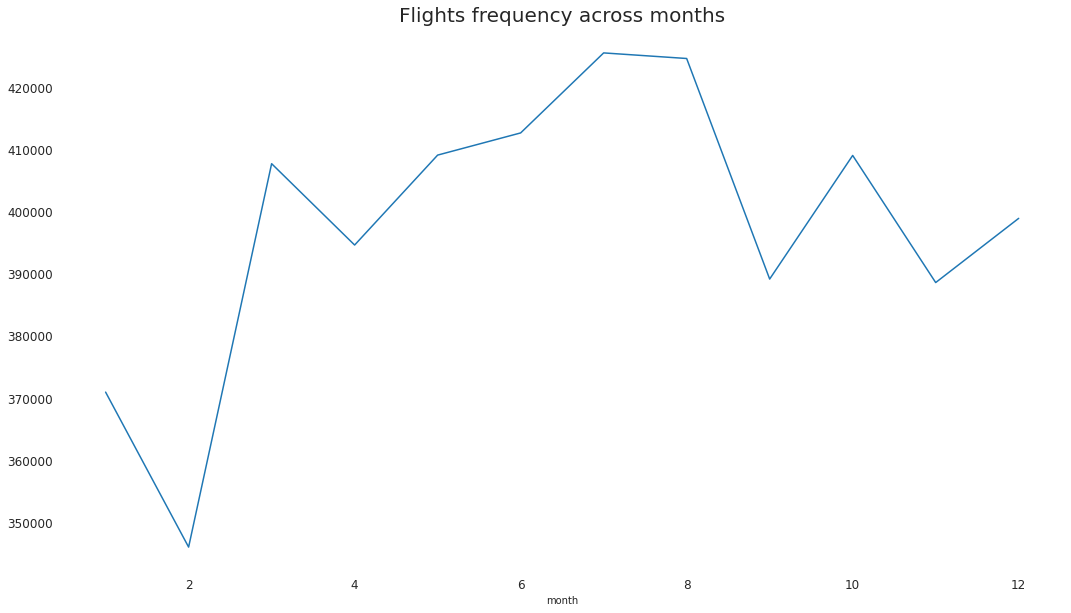

In [124]:
fig = plt.figure(figsize=[18, 10])
ax = fig.add_subplot(111)
ax.set_facecolor('white')
ax.set_title("Flights frequency across months", fontsize=20);
buzMonth.plot(ax=ax,  legend=False, fontsize=12)
plt.show()

In [ ]:
X.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'op_unique_carrier', 'tail_num', 'origin_airport_id', 'origin', 'dest',
       'crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'month', 'year', 'day_of_week', 'holiday'],
      dtype='object')

In [ ]:
skew_df = pd.DataFrame(data.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,mkt_carrier_fl_num,0.369808,0.369808,False
1,op_carrier_fl_num,0.370280,0.370280,False
2,origin_airport_id,0.067074,0.067074,False
3,dest_airport_id,0.067064,0.067064,False
4,crs_dep_time,0.068136,0.068136,False
5,dep_delay,NaN,NaN,False
6,crs_arr_time,-0.287410,0.287410,False
7,arr_time,NaN,NaN,False
8,arr_delay,NaN,NaN,False
9,cancelled,7.495427,7.495427,True


In [ ]:
import seaborn as sns

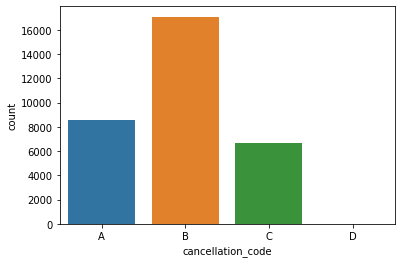

In [ ]:
sns.countplot(x='cancellation_code',data=dropped)

# data transformation

# data scaling